In [20]:
# !pip install gensim
# !pip install python-Levenshtein

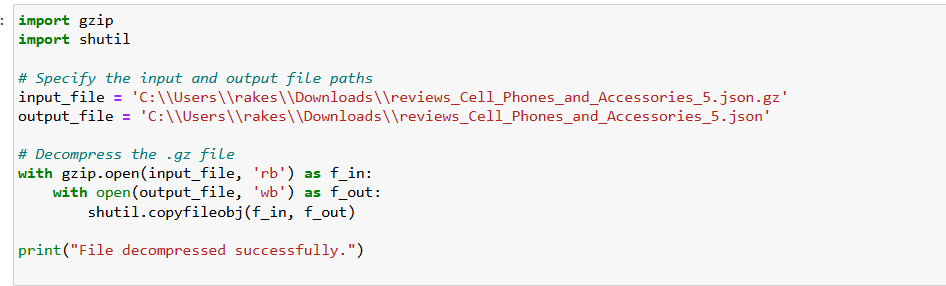

In [21]:
import gensim
import pandas as pd

### Reading and Exploring the Dataset
The dataset we are using here is a subset of Amazon reviews from the Cell Phones & Accessories category. The data is stored as a JSON file and can be read using pandas.

Link to the Dataset: http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Cell_Phones_and_Accessories_5.json.gz

In [22]:
import pandas as pd
import os
# Specify the path to your JSON file
file_path = r'R:\ML\DEEP learning\csv\reviews_Cell_Phones_and_Accessories_5.json'

# Check if the file exists
if os.path.isfile(file_path):
    try:
        # Read the JSON file
        df = pd.read_json(file_path, lines=True)
        print(df.head())  # Display the first few rows of the DataFrame
    except Exception as e:
        print(f"An error occurred while reading the JSON file: {e}")
else:
    print(f"File not found: {file_path}")

       reviewerID        asin      reviewerName helpful  \
0  A30TL5EWN6DFXT  120401325X         christina  [0, 0]   
1   ASY55RVNIL0UD  120401325X          emily l.  [0, 0]   
2  A2TMXE2AFO7ONB  120401325X             Erica  [0, 0]   
3   AWJ0WZQYMYFQ4  120401325X                JM  [4, 4]   
4   ATX7CZYFXI1KW  120401325X  patrice m rogoza  [2, 3]   

                                          reviewText  overall  \
0  They look good and stick good! I just don't li...        4   
1  These stickers work like the review says they ...        5   
2  These are awesome and make my phone look so st...        5   
3  Item arrived in great time and was in perfect ...        4   
4  awesome! stays on, and looks great. can be use...        5   

                                     summary  unixReviewTime   reviewTime  
0                                 Looks Good      1400630400  05 21, 2014  
1                      Really great product.      1389657600  01 14, 2014  
2                         

In [23]:
df.shape

(194439, 9)

### Simple Preprocessing & Tokenization
The first thing to do for any data science task is to clean the data.
For NLP, we apply various processing like converting all the words to lower case, trimming spaces, removing punctuations. 
This is something we will do over here too.

Additionally, we can also remove stop words like 'and', 'or', 'is', 'the', 'a', 'an' and convert words to their root forms like 'running' to 'run'.

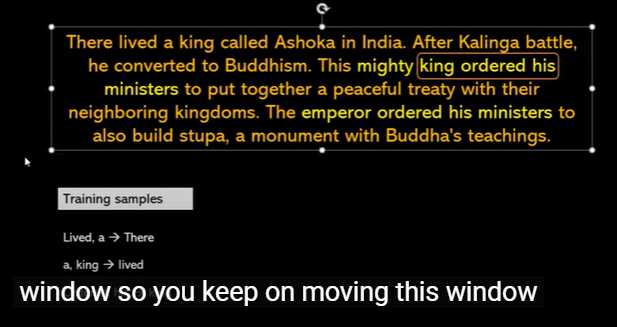
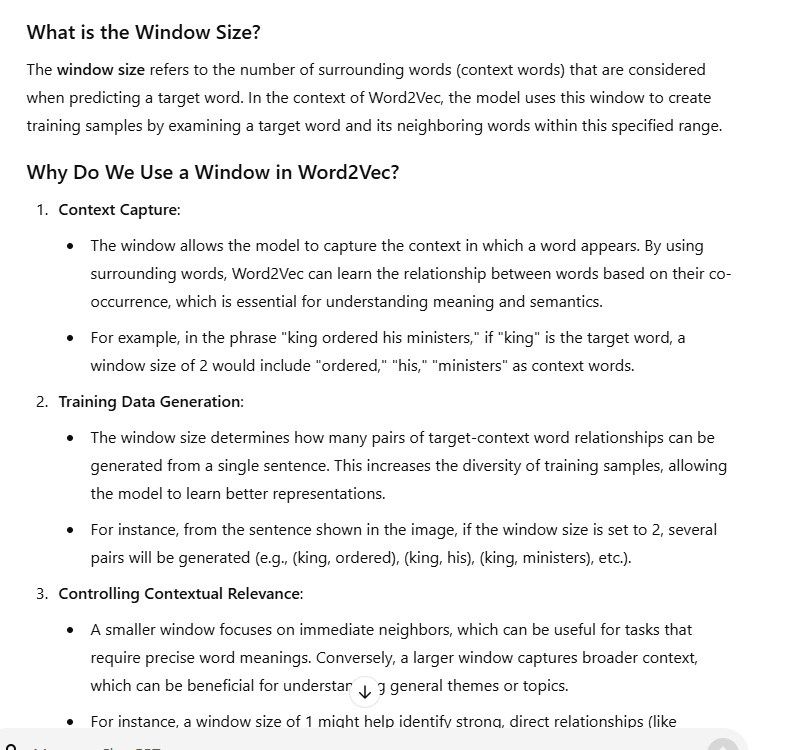

In [24]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

In [25]:
review_text

0         [they, look, good, and, stick, good, just, don...
1         [these, stickers, work, like, the, review, say...
2         [these, are, awesome, and, make, my, phone, lo...
3         [item, arrived, in, great, time, and, was, in,...
4         [awesome, stays, on, and, looks, great, can, b...
                                ...                        
194434    [works, great, just, like, my, original, one, ...
194435    [great, product, great, packaging, high, quali...
194436    [this, is, great, cable, just, as, good, as, t...
194437    [really, like, it, becasue, it, works, well, w...
194438    [product, as, described, have, wasted, lot, of...
Name: reviewText, Length: 194439, dtype: object

In [26]:
review_text.loc[0]

['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

In [27]:
df.reviewText.loc[0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

### Training the Word2Vec Model

Train the model for reviews. Use a window of size 10 i.e. 10 words before the present word and 10 words ahead. A sentence with at least 2 words should only be considered, configure this using min_count parameter.

Workers define how many CPU threads to be used.

#### Initialize the model

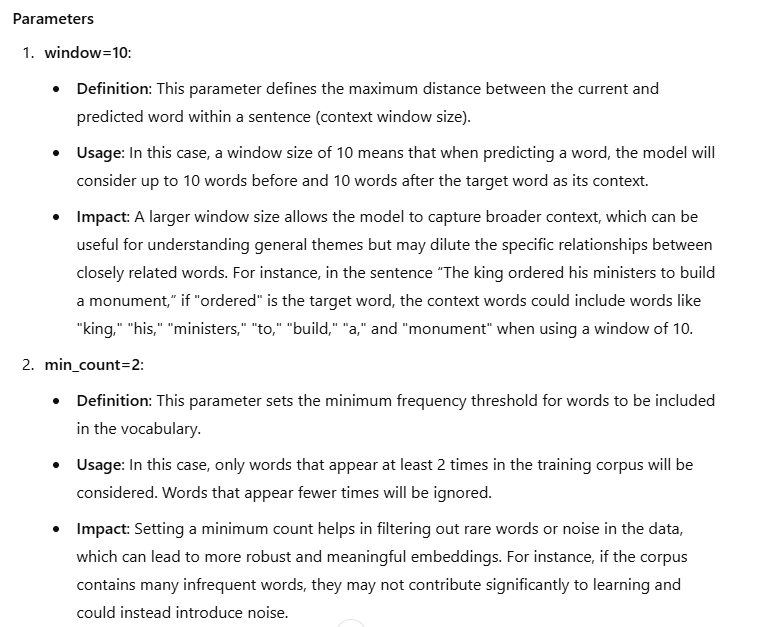

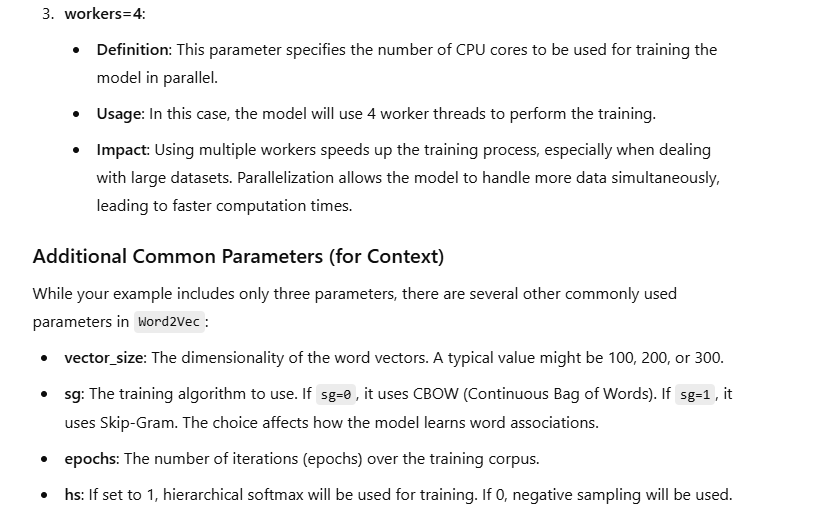

In [28]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)


#### Build Vocabulary

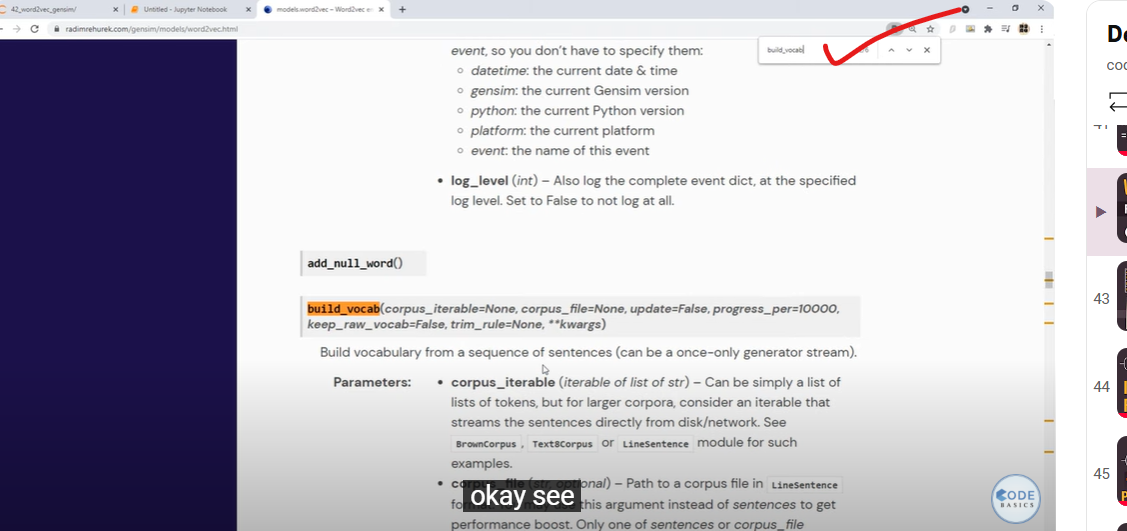

In [29]:
model.build_vocab(review_text, progress_per=1000)

#### Train the Word2Vec Model

In [30]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(61504298, 83868975)

### Save the Model

Save the model so that it can be reused in other applications

In [31]:
model.save("./word2vec-amazon-cell-accessories-reviews-short.model")

### Finding Similar Words and Similarity between words
https://radimrehurek.com/gensim/models/word2vec.html

In [36]:
model.wv.most_similar("bad")

[('terrible', 0.6697587370872498),
 ('shabby', 0.6083390116691589),
 ('horrible', 0.5986014604568481),
 ('good', 0.5770606994628906),
 ('pathetic', 0.5565235018730164),
 ('funny', 0.5453649759292603),
 ('legit', 0.545275092124939),
 ('awful', 0.5182134509086609),
 ('poor', 0.5173739194869995),
 ('okay', 0.505530834197998)]

In [33]:
model.wv.similarity(w1="cheap", w2="inexpensive")

0.53800964

In [34]:
model.wv.similarity(w1="great", w2="good")

0.78640795

In [35]:
import gzip
import shutil

# Specify the input and output file paths
input_file = 'C:\\Users\\rakes\\Downloads\\reviews_Cell_Phones_and_Accessories_5.json.gz'
output_file = 'C:\\Users\\rakes\\Downloads\\reviews_Cell_Phones_and_Accessories_5.json'

# Decompress the .gz file
with gzip.open(input_file, 'rb') as f_in:
    with open(output_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("File decompressed successfully.")


File decompressed successfully.


In [38]:
vector = model.wv['computer']  # get numpy vector of a word
sims = model.wv.most_similar('computer', topn=10)  # get other similar words

### Further Reading

You can read about gensim more at https://radimrehurek.com/gensim/models/word2vec.html

Explore other Datasets related to Amazon Reviews: http://jmcauley.ucsd.edu/data/amazon/

## Exercise

Train a word2vec model on the [Sports & Outdoors Reviews Dataset](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Sports_and_Outdoors_5.json.gz)
Once you train a model on this, find the words most similar to 'awful' and find similarities between the following word tuples: ('good', 'great'), ('slow','steady')

Click here for [solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/42_word2vec_gensim/42_word2vec_gensim_exercise_solution.ipynb).